# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fika Saputri
- **Email:** fikasaputri818@gmail.com
- **ID Dicoding:** MC206D5X0930

## Menentukan Pertanyaan Bisnis

-    Bagaimana  tren jumlah pesanan dari tahun ke tahun?
-    Kategori produk apa yang paling sering dipesan oleh pelanggan?
-  Berapa rata-rata waktu pengiriman dari pemesanan hingga terima
pelanggan?
-  Bagaimana distirbusi metode pembayaran yang digunakan oleh pelanggan ?
-  Bagaimana hubungan antara review score dan waktu pengiriman?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
orders_items_df= pd.read_csv("order_items_dataset.csv")
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
review_df= pd.read_csv("order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
payments_df = pd.read_csv("order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
category_translation_df=pd.read_csv("product_category_name_translation.csv")
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
customers_df= pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
geolocation_df= pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Data di atas berasal dari beberapa table seperti orders_dataset.csv,orders_item.csv,orders_payment.csv,product.csv,order_review.csv,product_category_name_translation.csv,customer.csv,sellers.csv.dan geolocation.csv

### Assessing Data

# Menilai table orders_df

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
orders_df[orders_df['order_status'] == 'delivered']['order_delivered_customer_date'].isnull().sum()

np.int64(8)

In [14]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


# Menilai table orders_items_df

In [16]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
orders_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [18]:
print("Jumlah duplikasi: ",orders_items_df.duplicated().sum())
orders_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


# Menilai table review_df

In [19]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
review_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [21]:
print("Jumlah duplikasi: ",review_df.duplicated().sum())
review_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Menilai table payments_df

In [22]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


# Menilai table products_df

In [24]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# Menilai table category_translation_df

In [26]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
category_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [28]:
print("Jumlah duplikasi: ",category_translation_df.duplicated().sum())
category_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


# Menilai table customers_df

In [29]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [30]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


# Menilai sellers_df

In [32]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [33]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [34]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


# Menilai geolocation_df

In [35]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [36]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [37]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Dataset Memiliki beberapa missing value terutama pada kolom (order_approved_at,order_delivered_carrier_date order_delivered_customer_date)
- xxx

### Cleaning Data

# Clening table orders_df

In [38]:
orders_df = pd.read_csv("orders_dataset.csv")
# orders_df.describe()
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


      memperbaiki tipe data

In [39]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [40]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


  menangani missing value (NaN)

In [41]:
print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [42]:
orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"], inplace=True)
orders_df["order_delivered_carrier_date"].fillna(pd.NaT, inplace=True)
orders_df["order_delivered_customer_date"].fillna(pd.NaT, inplace=True)
orders_df = orders_df[orders_df["order_estimated_delivery_date"] >= orders_df["order_purchase_timestamp"]]
orders_df = orders_df[orders_df["order_delivered_customer_date"] >= orders_df["order_approved_at"]]
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'],inplace=True)

/tmp/ipykernel_8988/805549544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"], inplace=True)
/tmp/ipykernel_8988/805549544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [43]:
print(orders_df.isna().sum())
orders_df.info()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 96415 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96415 non-null  object        
 1   customer_id                    96415 non-null  object        
 2   order_status                   96415 non-null  object        
 3   order_purchase_timestamp       96415 non-null  datetime64[ns]
 4   order_approved_at              96415 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96415 non-null  datetime64[ns]
 6   order_delivered_customer_date  96415 non-null  datetime64[ns]
 

In [44]:
print(orders_df["order_status"].value_counts())

order_status
delivered    96409
canceled         6
Name: count, dtype: int64


In [45]:
orders_df = orders_df[orders_df["order_status"] != "canceled"]

In [46]:
print(orders_df["order_status"].value_counts())

order_status
delivered    96409
Name: count, dtype: int64


In [47]:
print(orders_df.isna().sum())
orders_df.info()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 96409 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96409 non-null  object        
 1   customer_id                    96409 non-null  object        
 2   order_status                   96409 non-null  object        
 3   order_purchase_timestamp       96409 non-null  datetime64[ns]
 4   order_approved_at              96409 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96409 non-null  datetime64[ns]
 6   order_delivered_customer_date  96409 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96409 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


# Cleaning table orders_items_df

In [48]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [49]:
orders_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

mengganti tipe data

In [50]:
orders_items_df["shipping_limit_date"] = pd.to_datetime(orders_items_df["shipping_limit_date"], errors="coerce")

In [51]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


# Cleaning table review_df

In [52]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


mengubah tipe data

In [53]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
    review_df[column] = pd.to_datetime(review_df[column])

duplicate review

In [54]:
print(review_df.duplicated(subset=["review_id"]).sum())

814


In [55]:
review_df.drop_duplicates(subset=["review_id"], inplace=True)

missing value

In [56]:
print(review_df.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       86891
review_comment_message     57742
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [57]:
review_df = review_df[~((review_df["review_comment_title"] == "No Title") &
                        (review_df["review_comment_message"] == "No Comment"))]

In [58]:
review_df["review_comment_title"].fillna("No Ttile", inplace=True)
review_df["review_comment_message"].fillna("No Comment", inplace=True)

/tmp/ipykernel_8988/1613528390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  review_df["review_comment_title"].fillna("No Ttile", inplace=True)
/tmp/ipykernel_8988/1613528390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [59]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Ttile,No Comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Ttile,No Comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Ttile,No Comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Ttile,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Ttile,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [60]:
review_df = review_df [
    ~((review_df["review_comment_title"] == "No Title") &
      (review_df["review_comment_message"] == "No Comment"))

]

In [61]:
print(review_df.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


# Cleaning table payments_df

In [62]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [63]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [64]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Cleaning table products_df

In [65]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


menangani missing value

In [66]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [67]:
products_df["product_category_name"].fillna("unknown", inplace=True)

/tmp/ipykernel_8988/3365687060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna("unknown", inplace=True)


In [68]:
num_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

for col in num_cols:
    median_value = products_df[col].median()
    products_df[col].fillna(median_value, inplace=True)

print("sudah cleaning nihh", products_df.isnull().sum())

sudah cleaning nihh product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


/tmp/ipykernel_8988/2300545313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[col].fillna(median_value, inplace=True)
/tmp/ipykernel_8988/2300545313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [69]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Cleaning table category_translation_df

In [70]:
category_translation_df.describe()
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


# Cleaning table customers_df

In [71]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [72]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [73]:
customers_df["customer_city"] = customers_df["customer_city"].str.strip().str.lower()

# Cleaning table sellers_df

In [74]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [75]:
print("unique seller_id:", sellers_df["seller_id"].nunique(), "dari", len(sellers_df))

unique seller_id: 3095 dari 3095


In [76]:
sellers_df["seller_city"] = sellers_df["seller_city"].str.strip().str.lower()
sellers_df["seller_state"] = sellers_df["seller_state"].str.strip().str.upper()

In [77]:
sellers_df = sellers_df[sellers_df["seller_zip_code_prefix"] > 0 ]

In [78]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

# Cleaning table geolocation_df

In [79]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [80]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore orders_df

In [81]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
91410,96eb7f709abac11cbb2502c63d8c1ae6,530d2038f10bff32ab518da55c93cb0a,delivered,2017-11-24 08:40:31,2017-11-24 09:50:40,2017-11-24 22:44:36,2017-12-08 00:47:50,2017-12-15
83936,fe17148ab6bdbcf44f2da8a81c4ace85,777f62d9fa8a90d9536308bfa4181ab5,delivered,2017-06-01 16:25:59,2017-06-01 16:35:18,2017-06-02 15:09:55,2017-06-08 15:22:10,2017-07-03
16997,aa9c455b2d9888927e1b006b22980c5e,7c6f26d1942cbc6f1d17d56e13285e7b,delivered,2018-08-12 19:14:56,2018-08-12 19:25:21,2018-08-14 13:31:00,2018-08-28 00:46:40,2018-08-27
38840,6633cc9b9695c1fd9c51bd5afca04286,034dc20625271d7092e8228d1a80cac4,delivered,2018-07-24 22:33:06,2018-07-24 22:45:07,2018-07-25 12:44:00,2018-08-01 16:08:44,2018-08-09
46069,87f532dad65980681431fe6307b47fb3,a3df28f0215cc96363ccc1273d27f880,delivered,2018-08-13 13:35:49,2018-08-13 13:50:27,2018-08-13 14:46:00,2018-08-18 02:36:28,2018-08-28


In [82]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96409,96409,96409,96409,96409,96409,96409,96409
unique,96409,96409,1,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96409,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 21:34:31.332147456,2018-01-02 07:46:10.920360448,2018-01-05 03:02:55.590079744,2018-01-14 11:05:58.966216960,2018-01-25 15:23:29.134001664
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 07:49:05,2017-09-14 12:15:12,2017-09-18 16:15:42,2017-09-25 22:05:55,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 17:59:20,2018-01-22 10:19:20,2018-01-24 14:36:34,2018-02-02 18:41:45,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 17:18:17,2018-05-06 00:30:34,2018-05-08 14:20:00,2018-05-15 21:58:37,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [83]:
orders_df.describe()
orders_df.describe(include="object")

,order_id,customer_id,order_status
count,96409,96409,96409
unique,96409,96409,1
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered
freq,1,1,96409


In [84]:
orders_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered    96409
Name: customer_id, dtype: int64

In [85]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.month

In [86]:
print(orders_df["order_month"].value_counts().sort_index())

order_month
1      7817
2      8207
3      9549
4      9086
5     10294
6      9228
7     10002
8     10538
9      4143
10     4743
11     7288
12     5514
Name: count, dtype: int64


In [87]:
print(orders_df["year"].value_counts().sort_index())

year
2016      267
2017    43416
2018    52726
Name: count, dtype: int64


In [88]:
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_estimated_delivery_date"]= pd.to_datetime(orders_df["order_estimated_delivery_date"])

In [89]:
orders_df["delivery_delay"] = (orders_df["order_delivered_customer_date"] - orders_df["order_estimated_delivery_date"]).dt.days

In [90]:
orders_df["delivery_delay"].describe()

count    96409.000000
mean       -11.876568
std         10.184357
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64

In [91]:
print((orders_df["delivery_delay"] > 0).sum(), "pesanan terlambat")
print((orders_df["delivery_delay"] == 0).sum(), "pesanan tepat waktu")
print((orders_df["delivery_delay"] < 0).sum(),  "pesanan terlambat")

6533 pesanan terlambat
1291 pesanan tepat waktu
88585 pesanan terlambat


In [92]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_month,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,-6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,-13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,-10


In [93]:
orders_df["delivery_time"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

In [94]:
order_review_df = pd.merge(
    left=orders_df[['order_id', 'delivery_time']],
    right=review_df[['order_id', 'review_score']],
    how="inner",
    on="order_id"
)

print(order_review_df.groupby("review_score")["delivery_time"].mean())

review_score
1    20.896199
2    16.187070
3    13.788125
4    11.844763
5    10.219820
Name: delivery_time, dtype: float64


### Explore orders_items_df

In [95]:
orders_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14593,213ede0c70c581ede2b365194da6d2fe,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-10-09 12:56:48,99.0,41.08
49185,6fc020b0ec995fb761ee385f34df5a6a,1,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,2017-09-19 17:10:40,110.0,14.16
25473,39f2f1bc7660c36850e4d3798f120658,1,259bd66612b61aa4e82ce3cde9272bbc,955fee9216a65b617aa5c0531780ce60,2017-12-06 13:52:15,32.0,11.85
43791,6386b8aabb7f032b77475740cb035e86,2,a42d9c825894f96fc6ed02610891454d,4d6d651bd7684af3fffabd5f08d12e5a,2017-06-15 11:15:26,69.9,10.75
69731,9f2518b72db159913ee42d53fa1a9568,1,c3da218d508e5f56c8b7f9e254ef8cef,c7fdb77fdbff3c41981bc52f787e959e,2018-05-14 12:57:00,18.4,8.29


In [96]:
orders_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [97]:
orders_items_df.duplicated().sum()

np.int64(0)

In [98]:
orders_items_df[["product_id", "price"]].sort_values(by="price", ascending=False).head(10)
orders_items_df[["product_id", "price"]].sort_values(by="price", ascending=True).head(10)

,product_id,price
27652,8a3254bee785a526d548a81a9bc3c9be,0.85
48625,8a3254bee785a526d548a81a9bc3c9be,0.85
87081,8a3254bee785a526d548a81a9bc3c9be,0.85
57302,05b515fdc76e888aada3c6d66c201dff,1.20
57305,05b515fdc76e888aada3c6d66c201dff,1.20
57297,270516a3f41dc035aa87d220228f844c,1.20
57306,05b515fdc76e888aada3c6d66c201dff,1.20
57304,05b515fdc76e888aada3c6d66c201dff,1.20
57298,05b515fdc76e888aada3c6d66c201dff,1.20
57301,05b515fdc76e888aada3c6d66c201dff,1.20


In [99]:
top_product = orders_items_df['product_id'].value_counts().head(10)
print(top_product)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


In [100]:
orders_items_df["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [101]:
orders_items_df["freight_value"].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

### Explore payments_df

In [102]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
81510,d6d19a688e4325d068ef11d205a4c92f,1,credit_card,1,44.26
17764,ab5ff8523a162735e1d5ce37a2e4be76,1,boleto,1,86.58
22863,46ad8f532d3f76a1747288a6a5a88a18,1,credit_card,5,221.79
99882,b45d11b61c2a68756bbbd7665d67e812,1,credit_card,8,106.38
28010,87e628a37d874ec67e4573f102c4c4ac,1,credit_card,10,850.56


In [103]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [104]:
payments_df.describe(include="object")

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [105]:
payments_df["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [106]:
payments_df.groupby("payment_type")["payment_value"].mean()

payment_type
boleto         145.034435
credit_card    163.319021
debit_card     142.570170
not_defined      0.000000
voucher         65.703354
Name: payment_value, dtype: float64

In [107]:
payment_order_df = pd.merge(
    left=payments_df,
    right=orders_df[["order_id", "order_status"]],
    how="left",
    on="order_id"
)

payment_order_df.groupby("order_status")["payment_type"].value_counts()

order_status  payment_type
delivered     credit_card     74547
              boleto          19170
              voucher          5488
              debit_card       1478
Name: count, dtype: int64

### Explore review_df

In [108]:
review_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
20536,a057d6a44fd71b7629e842838c97756d,0ce0997380b2110e5d35697ce4ddabd7,1,recomendo,Estou aguardando uma posição da loja em relaçã...,2018-05-30,2018-05-30 11:02:21
98588,cb7d98455ba032a7c1e17e2011ce2591,cc0a0d27ed6897ad08f28a1f2472a49d,3,No Ttile,No Comment,2017-04-16,2017-04-17 20:19:13
97908,806a11515e2221e016a172fe64f009b8,a7ecb6cd7ccbea584ec3f96ecc6fc8b1,5,No Ttile,No Comment,2018-01-18,2018-01-19 02:43:52
57350,55d3d6a0697d177d5e74691c1e79fb83,6413bab2628f99100c492390a5a54231,5,No Ttile,Otimo produto.,2017-08-18,2017-08-21 16:04:24
90040,94ae00f23581819a47665049bc25b51a,f9e65963f3f83f99489c898626cadd7e,5,No Ttile,"Entrega rápida, o produto é muito bom , fácil ...",2017-11-11,2017-11-12 23:01:00


In [109]:
review_df.isnull().sum()
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     98410 non-null  object        
 4   review_comment_message   98410 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


In [110]:
review_df["review_score"].value_counts().sort_index()

review_score
1    11282
2     3114
3     8097
4    19007
5    56910
Name: count, dtype: int64

In [111]:
def categori_review(score):
    if score >= 4:
        return "Positif"
    elif score == 3:
        return "Netral"
    else:
        return "Negativ"

review_df["review_categori"] = review_df["review_score"].apply(categori_review)

print(review_df["review_categori"].value_counts())

review_categori
Positif    75917
Negativ    14396
Netral      8097
Name: count, dtype: int64


In [112]:
review_delivery_df = pd.merge(
    left=review_df[['order_id', 'review_score']],
    right=orders_df[['order_id', 'delivery_time']],
    how="inner",
    on="order_id"
)
print(review_delivery_df.groupby("review_score")["delivery_time"].mean())

review_score
1    20.896199
2    16.187070
3    13.788125
4    11.844763
5    10.219820
Name: delivery_time, dtype: float64


### Explore customers_df

In [113]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
41576,9448711e9143b3cb9f54d8526bc8655d,7c897328e8e63128ba7db8d9bd8da6d6,30520,belo horizonte,MG
41258,ddb3210d529059762180da43418dca11,b83f14e183f25e0771ed116680199b4e,87502,umuarama,PR
7930,1322ab99d2cdd4a0da0150a209d321c5,032b3a42598667caf2e099999b9dc1b9,92030,canoas,RS
146,a6c49eaa9ed575df1a3476b20668ab3b,113bdaf5255ce5a458057ebf9975befb,37589,silvianopolis,MG
12321,206c0fcc717333d169ff95933fb47341,9a3526eee723accd014ec683afe5bf20,31230,belo horizonte,MG


In [114]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [115]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [116]:
customers_df["customer_id"].nunique()

99441

In [117]:
customers_df["customer_city"].value_counts().head(10)
customers_df["customer_state"].value_counts().head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

In [118]:
# kota yg memiliki bnyk pesanan trbanyk
customer_order_df = pd.merge(
    left=customers_df,
    right=orders_df[["customer_id", "order_id"]],
    how="left",
    on="customer_id"
)

city_orders = customer_order_df["customer_city"].value_counts().head(10)
print(city_orders)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


### Explore products_df

In [119]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27966,f6453858964de0e03cbc5ceeef4e6ebd,automotivo,57.0,1145.0,6.0,5050.0,53.0,43.0,11.0
523,6a23ae3187f1dac41b7210a8c7739d6b,moveis_decoracao,52.0,832.0,1.0,750.0,20.0,35.0,20.0
16064,7a2428849e8c9e1cfac00494791ca876,cama_mesa_banho,50.0,234.0,1.0,900.0,38.0,6.0,29.0
31893,db63fab600827fdc6ef686c30f5ccb42,construcao_ferramentas_construcao,56.0,309.0,1.0,550.0,20.0,5.0,25.0
13988,8cc83a79f9db9fd5f391c6c6c5e0dc4d,telefonia,42.0,432.0,5.0,150.0,17.0,8.0,14.0


In [120]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [121]:
print(products_df.describe(include="object"))

                              product_id product_category_name
count                              32951                 32951
unique                             32951                    74
top     106392145fca363410d287a815be6de4       cama_mesa_banho
freq                                   1                  3029


In [122]:
order_product_df = pd.merge(
    left=orders_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

category_sales = order_product_df["product_category_name"].value_counts()
print(category_sales)

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 74, dtype: int64


### Explore sellers_df

In [123]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1215,4bf2f4ee540798a61f9636d12cd9cc80,19814,assis,SP
1147,688756f717c462a206ad854c5027a64a,7094,guarulhos,SP
633,da03c298e3999e9d828591fc2179d109,4041,sao paulo,SP
449,5b2e94f2c22b39ccc24d34ad0f669672,1214,sao paulo,SP
1915,dbec9a0a7efeff029d4d9dce7dc4cc95,31920,belo horizonte,MG


In [124]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [125]:
sellers_df.describe(include="object")

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,9e25199f6ef7e7c347120ff175652c3b,sao paulo,SP
freq,1,694,1849


In [126]:
sellers_df["seller_zip_code_prefix"].value_counts().head(10)

seller_zip_code_prefix
14940    49
13660    10
16200     9
13920     9
1026      8
87050     8
14020     8
37540     7
13481     7
87015     6
Name: count, dtype: int64

In [127]:
sellers_df["seller_city"].value_counts().head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64

In [128]:
sellers_df["seller_state"].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

### Explore geolocation_df

In [129]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
505301,27215,-22.503710,-44.092590,volta redonda,RJ
113241,4938,-23.688420,-46.759334,sao paulo,SP
355385,15706,-20.277165,-50.558909,jales,SP
390438,18550,-23.282193,-47.682251,boituva,SP
748877,63044,-7.232539,-39.346495,juazeiro do norte,CE


In [130]:
geolocation_df["geolocation_city"].value_counts().head(10)



geolocation_city
sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: count, dtype: int64

In [131]:
geolocation_df["geolocation_state"].value_counts()

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

In [132]:
lok_state = geolocation_df.groupby("geolocation_state").size().reset_index(name="count")
print(lok_state.sort_values(by="count", ascending=False))

   geolocation_state   count
25                SP  404268
10                MG  126336
18                RJ  121169
22                RS   61851
17                PR   57859
23                SC   38328
4                 BA   36045
8                 GO   20139
7                 ES   16748
15                PE   16432
6                 DF   12986
12                MT   12031
5                 CE   11674
13                PA   10853
11                MS   10431
9                 MA    7853
14                PB    5538
19                RN    5041
16                PI    4549
1                 AL    4183
26                TO    3576
24                SE    3563
20                RO    3478
2                 AM    2432
0                 AC    1301
3                 AP     853
21                RR     646


# EXPLORE ALL DATA

### menghubungkan semua data

In [133]:
all_df = pd.merge(
    left=orders_df,
    right=orders_items_df,
    how="left",
    on="order_id"
)

In [134]:
all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    on="product_id"
)

In [135]:
all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

In [136]:
all_df = pd.merge(
    left=all_df,
    right=payments_df,
    how="left",
    on="order_id"
)

In [137]:
all_df = pd.merge(
    left=all_df,
    right=review_df,
    how="left",
    on="order_id"
)

In [138]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115280 entries, 0 to 115279
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115280 non-null  object        
 1   customer_id                    115280 non-null  object        
 2   order_status                   115280 non-null  object        
 3   order_purchase_timestamp       115280 non-null  datetime64[ns]
 4   order_approved_at              115280 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115280 non-null  datetime64[ns]
 6   order_delivered_customer_date  115280 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115280 non-null  datetime64[ns]
 8   year                           115280 non-null  int32         
 9   order_month                    115280 non-null  int32         
 10  delivery_delay                 115280 non-null  int64         
 11  

In [139]:
all_df.columns = all_df.columns.str.strip()

In [140]:
all_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
year                                0
order_month                         0
delivery_delay                      0
delivery_time                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_uni

In [141]:
all_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
year                                0
order_month                         0
delivery_delay                      0
delivery_time                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_uni

In [142]:
all_df["review_score"].fillna(all_df["review_score"].median(), inplace=True)  # Isi dengan median score
all_df["review_creation_date"].fillna(all_df["order_purchase_timestamp"], inplace=True)  # Gunakan waktu pemesanan
all_df["review_answer_timestamp"].fillna(all_df["review_creation_date"], inplace=True)  # Gunakan waktu review
all_df["review_categori"].fillna("Unknown", inplace=True)  # Isi kategori dengan "Unknown"


/tmp/ipykernel_8988/392092257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["review_score"].fillna(all_df["review_score"].median(), inplace=True)  # Isi dengan median score
/tmp/ipykernel_8988/392092257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [143]:
all_df = all_df.dropna(subset=["review_comment_title"])

In [144]:
all_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
order_month                      0
delivery_delay                   0
delivery_time                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [169]:
all_df.to_csv("all_data.csv", index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana  tren jumlah pesanan dari tahun ke tahun?

In [146]:
all_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_month,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_categori
26375,3e6378294bcb6ea2ff0ff1eb3ba7388f,63150e501182768887ac59b79c6b8546,delivered,2018-05-12 16:33:05,2018-05-13 16:31:46,2018-05-16 06:00:00,2018-05-21 16:38:21,2018-06-08,2018,5,...,credit_card,4.0,199.48,15e7e581808bda9dcc02eba05aca20e4,5.0,No Ttile,No Comment,2018-05-22,2018-05-24 22:08:03,Positif
15422,e4c09ee4522daa0f32bd2e6b2f5ed048,cccd5136fc9518bcbf7eea735c6c2ae1,delivered,2018-08-04 22:22:59,2018-08-04 22:35:14,2018-08-08 09:48:00,2018-08-11 16:21:54,2018-08-16,2018,8,...,credit_card,8.0,914.27,1e92b3e035f0d9b738f6011a94932651,5.0,Entrega rápida,Recebi antes do prazo,2018-08-12,2018-08-16 01:15:08,Positif
50336,ad5e4b37aefeac1f582990bd5f5097e8,fb40b407e90dc1ba2d6fbe757fd3e9b1,delivered,2018-03-05 10:43:53,2018-03-05 10:55:35,2018-03-08 00:19:04,2018-03-28 12:03:56,2018-03-29,2018,3,...,credit_card,2.0,34.66,7f86dff3aff4f98d3e0f3934dd275760,5.0,No Ttile,rapido na entrega e produto conforme o anunciado,2018-03-29,2018-03-29 16:03:26,Positif
68887,56703a55199f4784c80fe5e5de71c532,6629da21929dbb3173791eb977b64d8b,delivered,2018-07-15 00:25:32,2018-07-17 07:31:30,2018-07-17 13:07:00,2018-07-18 16:51:29,2018-07-30,2018,7,...,boleto,1.0,72.32,5148ad2bdca65375e9504355d79c6ad4,1.0,Entrega incompleta,Realizei um pedido com dois itens e apenas 1 d...,2018-07-19,2018-07-23 16:44:54,Negativ
98499,40599d3d28b75746952ded75566637b9,efdf4a7c78d7c364046efb69035d1d4f,delivered,2017-01-05 13:01:48,2017-01-07 03:45:49,2017-01-11 16:08:53,2017-01-16 15:43:21,2017-02-13,2017,1,...,boleto,1.0,20.62,3e769b42496ad5804f129ea866de410f,5.0,No Ttile,No Comment,2017-01-17,2017-01-18 11:16:40,Positif


In [147]:
order_per_year = all_df.groupby("year")["order_id"].nunique().reset_index()

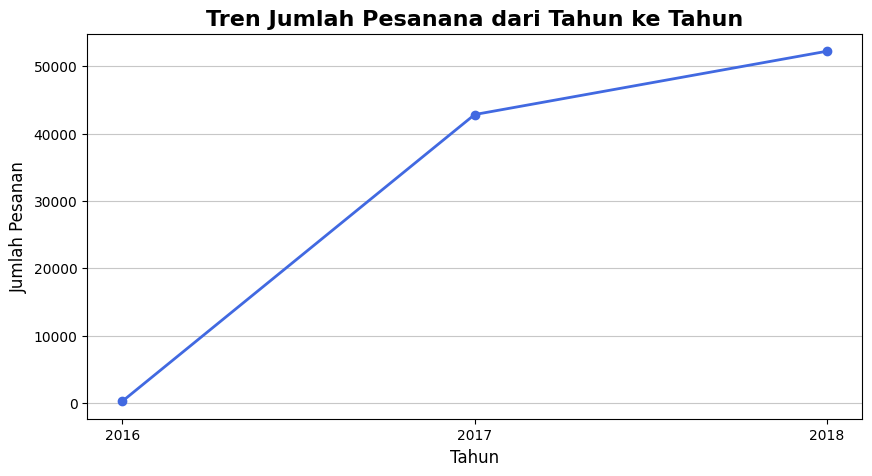

In [148]:
plt.figure(figsize=(10, 5))
plt.plot(
    order_per_year["year"],
    order_per_year["order_id"],
    marker="o",
    linewidth=2,
    color="royalblue"
)

plt.title("Tren Jumlah Pesanana dari Tahun ke Tahun", fontsize=16, fontweight="bold")
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(order_per_year["year"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle= "-", alpha=0.7)
plt.show()

### Pertanyaan 2: Kategori produk apa yang paling sering dipesan oleh pelanggan?

In [149]:
top_categories = all_df["product_category_name"].value_counts().head(10)

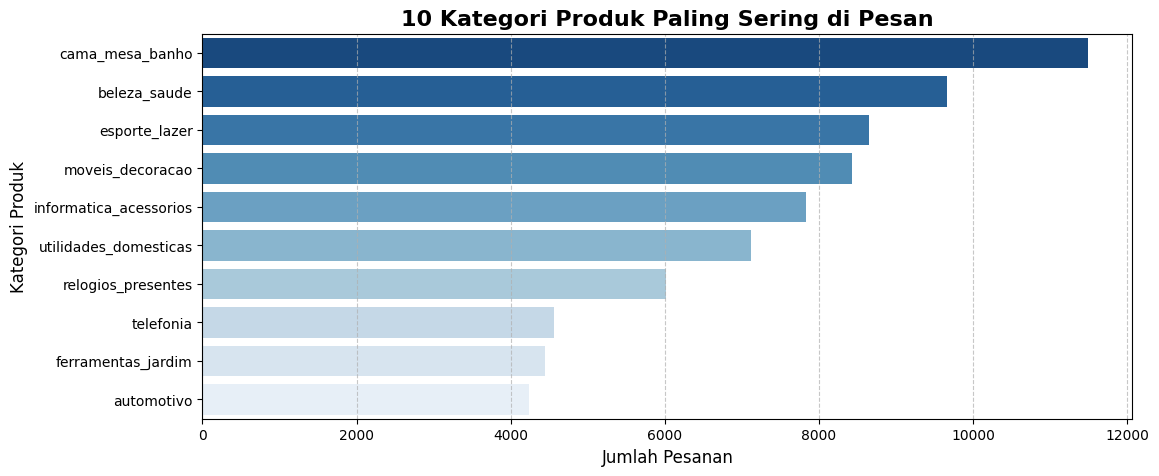

In [159]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,
    palette="Blues_r"
)

plt.title("10 Kategori Produk Paling Sering di Pesan", fontsize=16, fontweight="bold")
plt.xlabel("Jumlah Pesanan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.grid(axis="x", linestyle= "--", alpha=0.7)
plt.show()

### Pertanyaan 3: Berapa rata-rata waktu pengiriman dari pemesanan hingga terima pelanggan?

In [151]:
avg_delivery_time = all_df["delivery_time"].mean()

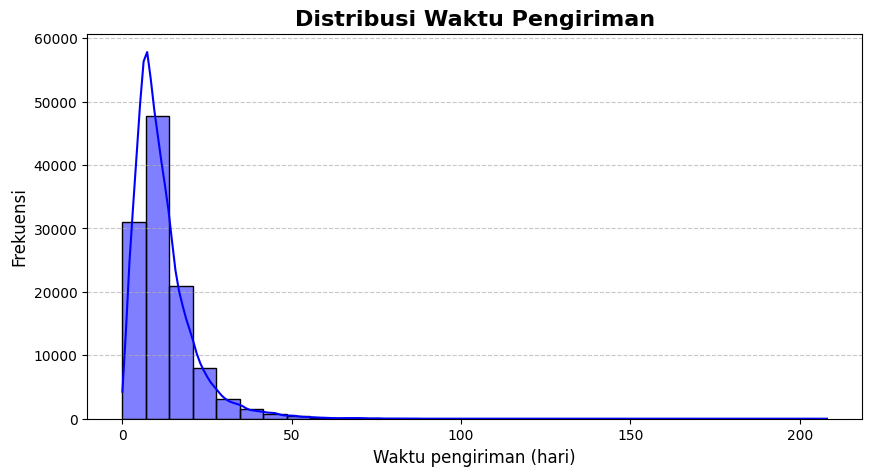

In [152]:
plt.figure(figsize=(10, 5))
sns.histplot(all_df["delivery_time"],
             bins=30,
             kde=True,
             color="blue")

plt.title("Distribusi Waktu Pengiriman", fontsize=16, fontweight="bold")
plt.xlabel("Waktu pengiriman (hari)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis="y", linestyle= "--", alpha=0.7)
plt.show()

### Pertanyaan 4: Bagaimana distirbusi metode pembayaran yang digunakan oleh pelanggan ?

In [153]:
payment_counts = all_df["payment_type"].value_counts()

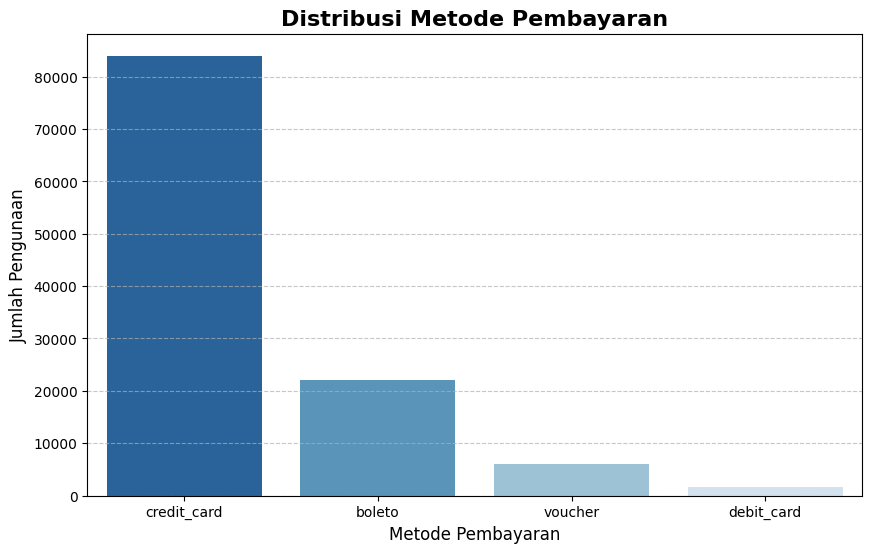

In [160]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=payment_counts.index,
    y=payment_counts.values,
    hue=payment_counts.index,
    palette="Blues_r"
)

plt.title("Distribusi Metode Pembayaran", fontsize=16, fontweight="bold")
plt.xlabel("Metode Pembayaran", fontsize=12)
plt.ylabel("Jumlah Pengunaan", fontsize=12)
plt.grid(axis="y", linestyle= "--", alpha=0.7)
plt.show()

### Pertanyaan 5:Bagaimana hubungan antara review score dan waktu pengiriman?

In [155]:
review_delivery_avg = all_df.groupby("review_score")["delivery_time"].mean().reset_index()

In [156]:
review_delivery_avg["review_score"] =  review_delivery_avg["review_score"].astype(int)

In [157]:
review_delivery_avg = review_delivery_avg.sort_values(by="review_score")

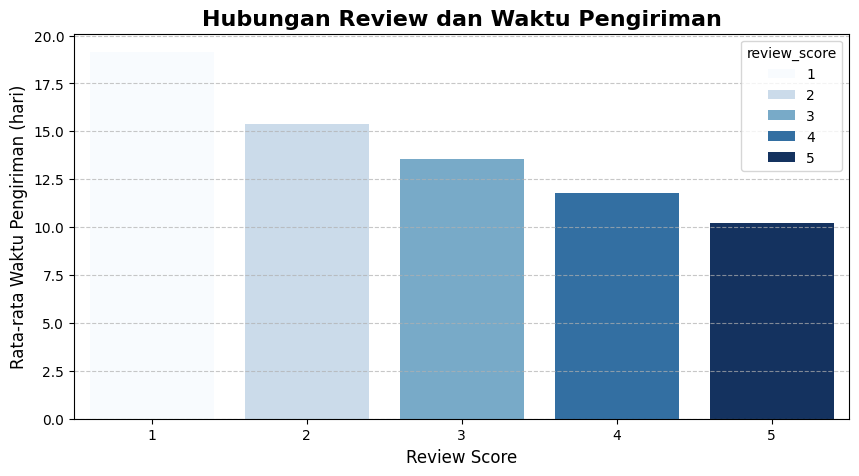

In [173]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=review_delivery_avg["review_score"],
    y=review_delivery_avg["delivery_time"],
    hue=review_delivery_avg["review_score"],
    palette="Blues",
    errorbar=None
 
)

plt.title("Hubungan Review dan Waktu Pengiriman", fontsize=16, fontweight="bold")
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Rata-rata Waktu Pengiriman (hari)", fontsize=12)
plt.grid(axis="y", linestyle= "--", alpha=0.7)
plt.show()

In [172]:
all_df.to_csv("all_data_prs.csv", index=False)

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2